In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
df = pd.read_csv('pv_readings.csv')

# Exploration and Cleaning

In [6]:
df.head()

,Timestamp,Light_level,Voltage,Current,Temperature,Humidity
0,1.709716e+09,21725.833333,0.000125,0.000125,45.0,0.0
1,1.709716e+09,32695.000000,0.000125,0.000125,45.0,0.0
2,1.709716e+09,24800.000000,0.000250,0.000250,46.0,0.0
3,1.709716e+09,6070.833333,0.000000,0.000000,45.0,0.0
4,1.709716e+09,54612.500000,0.000375,0.000375,45.0,0.0


In [7]:
df.replace({'None':np.nan}, inplace=True)

In [8]:
df.shape

(3892, 6)

In [9]:
df.isna().sum()

Timestamp         2
 Light_level      0
 Voltage          0
 Current          0
 Temperature    141
 Humidity       141
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(3749, 6)

In [12]:
df.isna().sum().sum()

0

In [13]:
df.columns = df.columns.str.strip()

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)

In [15]:
df.head()

,Timestamp,Light_level,Voltage,Current,Temperature,Humidity
0,2024-03-06 09:08:44.048041984,21725.833333,0.000125,0.000125,45.0,0.0
1,2024-03-06 09:08:54.603180800,32695.000000,0.000125,0.000125,45.0,0.0
2,2024-03-06 09:09:05.151827200,24800.000000,0.000250,0.000250,46.0,0.0
3,2024-03-06 09:09:15.706973184,6070.833333,0.000000,0.000000,45.0,0.0
4,2024-03-06 09:09:26.259571200,54612.500000,0.000375,0.000375,45.0,0.0


In [16]:
df.describe()

,Light_level,Voltage,Current,Temperature,Humidity
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,15873.632747,1.011217,1.013588,33.196052,17.311283
std,21752.889921,1.524862,1.526159,12.839134,14.891655
min,0.000000,-0.000375,-0.617269,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,23.000000,0.000000
50%,3754.166667,0.010750,0.010750,29.000000,12.000000
75%,24307.500000,3.211723,3.211848,44.000000,32.000000
max,54612.500000,4.096000,4.096000,63.000000,38.000000


# Readings Callibration

In [19]:
from sklearn.linear_model import LinearRegression
import pickle

In [20]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [21]:
df2 = pd.read_csv('pv_readings_new.csv')

In [25]:
X,y = df2['Voltage'], df2['Current']
lr_correction = LinearRegression()
lr_correction.fit(np.array(X).reshape(-1, 1), y)
df['Current'] = lr_correction.predict(np.array(df['Voltage']).reshape(-1, 1))
filename = 'lr_correction.sav'
pickle.dump(lr_correction, open(filename, 'wb'))

In [26]:
# Voltage sensor calibration (0 to 25 volt)
X = np.array([0.07912741477706228, 3.126595416119877]).reshape(-1, 1)
y = np.array([0, 25])
lr_voltage = LinearRegression()
lr_voltage.fit(X, y)
df['Voltage'] = lr_voltage.predict(df[['Voltage']])
filename = 'lr_voltage.sav'
pickle.dump(lr_voltage, open(filename, 'wb'))

# Current sensor calibration (0.06 mA = 0.8887771233252968)
X = np.array([0.8887771233252968, 0.9406537064729759, 0.9624043702505569, 1.0315314798425246]).reshape(-1, 1)
y = np.array([0.06, 0.32, 0.64, 0.95])
lr_current = LinearRegression()
lr_current.fit(X, y)
df['Current'] = lr_current.predict(df[['Current']])
filename = 'lr_current.sav'
pickle.dump(lr_current, open(filename, 'wb'))

# Visualization

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
lr_voltage.predict(np.array(1).reshape(-1,1))

array([7.55440734])

In [29]:
df.head(100)

,Timestamp,Light_level,Voltage,Current,Temperature,Humidity
0,2024-03-06 09:08:44.048041984,21725.833333,-0.648099,-5.856040,45.0,0.0
1,2024-03-06 09:08:54.603180800,32695.000000,-0.648099,-5.856040,45.0,0.0
2,2024-03-06 09:09:05.151827200,24800.000000,-0.647073,-5.855645,46.0,0.0
3,2024-03-06 09:09:15.706973184,6070.833333,-0.649124,-5.856435,45.0,0.0
4,2024-03-06 09:09:26.259571200,54612.500000,-0.646048,-5.855249,45.0,0.0
...,...,...,...,...,...,...
96,2024-03-06 09:39:47.022808064,54612.500000,28.621970,5.427809,60.0,0.0
97,2024-03-06 09:39:57.573067776,54612.500000,28.761434,5.481573,60.0,0.0
98,2024-03-06 09:40:08.122560000,54612.500000,28.715288,5.463784,60.0,0.0
99,2024-03-06 09:40:18.672420096,54612.500000,28.700931,5.458249,60.0,0.0


In [30]:
df['PV Power'] = df['Voltage'] * df['Current'] * .001 # Amperes

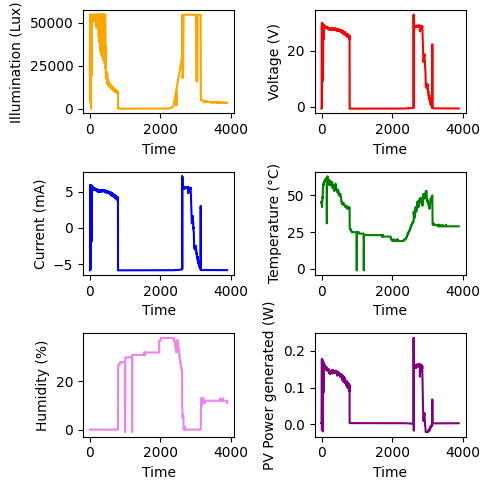

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 5))

colors = ['orange', 'red', 'blue', 'green', 'violet', 'purple']
labels = ['Illumination (Lux)','Voltage (V)','Current (mA)','Temperature (°C)','Humidity (%)','PV Power generated (W)']
k=0
for i in range(0,3):
    for j in range(0,2):
        sns.lineplot(x=df.index, y=df[df.columns[k+1]], color=colors[k], ax=axes[i][j])
        axes[i][j].set_xlabel('Time')
        axes[i][j].set_ylabel(labels[k])
        k+=1
fig.subplots_adjust(wspace=.5)
plt.tight_layout();

# Training

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [46]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_pv_readings_2.tf', monitor='val_loss', save_best_only=True, mode='min')

In [47]:
X = df.drop(columns=['Timestamp', 'Current', 'PV Power', 'Temperature', 'Humidity'])
y = df['Current']

In [48]:
X.columns

Index(['Light_level', 'Voltage'], dtype='object')

In [50]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, verbose=1, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/100


/home/tweety/.local/lib/python3.10/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


83/94 [=========================>....] - ETA: 0s - loss: 306964640.0000INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 292652320.0000 - val_loss: 16899812.0000
Epoch 2/100
77/94 [=======================>......] - ETA: 0s - loss: 102956456.0000INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 94087792.0000 - val_loss: 4890900.0000
Epoch 3/100
81/94 [========================>.....] - ETA: 0s - loss: 26835702.0000INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 9ms/step - loss: 24711980.0000 - val_loss: 1051536.5000
Epoch 4/100
93/94 [============================>.] - ETA: 0s - loss: 4693482.5000INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 16ms/step - loss: 4666308.5000 - val_loss: 151854.4531
Epoch 5/100
82/94 [=========================>....] - ETA: 0s - loss: 646079.9375INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 586688.2500 - val_loss: 13763.3389
Epoch 6/100
89/94 [===========================>..] - ETA: 0s - loss: 49823.5938INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 47871.5039 - val_loss: 762.0839
Epoch 7/100
79/94 [========================>.....] - ETA: 0s - loss: 3050.5698INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 2635.1223 - val_loss: 36.3134
Epoch 8/100
90/94 [===========================>..] - ETA: 0s - loss: 118.1124INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 11ms/step - loss: 114.1420 - val_loss: 31.1851
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 8.7849 - val_loss: 34.9330
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 6.6380 - val_loss: 35.5211
Epoch 11/100
94/94 [==============================] - 0s 4ms/step - loss: 6.4562 - val_loss: 35.5381
Epoch 12/100
94/94 [==============================] - 0s 4ms/step - loss: 6.3359 - val_loss: 35.5460
Epoch 13/100
94/94 [==============================] - 0s 5ms/step - loss: 6.2329 - val_loss: 35.5098
Epoch 14/100
84/94 [=========================>....] - ETA: 0s - loss: 5.9995INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 5.9629 - val_loss: 8.9816
Epoch 15/100
94/94 [==============================] - 0s 4ms/step - loss: 60.5071 - val_loss: 35.8030
Epoch 16/100
94/94 [==============================] - 0s 4ms/step - loss: 6.3843 - val_loss: 35.5506
Epoch 17/100
94/94 [==============================] - 0s 4ms/step - loss: 6.3774 - val_loss: 35.5081
Epoch 18/100
94/94 [==============================] - 0s 4ms/step - loss: 6.3752 - val_loss: 35.5337
Epoch 19/100
94/94 [==============================] - 0s 4ms/step - loss: 6.3755 - val_loss: 35.5530
Epoch 20/100
94/94 [==============================] - 0s 5ms/step - loss: 6.3730 - val_loss: 35.5535
Epoch 21/100
94/94 [==============================] - 1s 8ms/step - loss: 6.3675 - val_loss: 35.5567
Epoch 22/100
94/94 [==============================] - 1s 6ms/step - loss: 6.3686 - val_loss: 35.5149
Epoch 23/100
94/94 [==============================] - 0s 4ms/step - loss: 6.3672 - val_loss: 35.4553
Ep

In [51]:
from sklearn.model_selection import train_test_split
train, df2 = train_test_split(df, test_size=0.2, random_state=5)
val, test = train_test_split(df2, test_size=0.5, random_state=2)

In [52]:
X_train, y_train = train.drop(columns=['Timestamp', 'Current', 'PV Power', 'Temperature', 'Humidity']), train['Current']
X_val, y_val = val.drop(columns=['Timestamp', 'Current', 'PV Power', 'Temperature', 'Humidity']), val['Current']
X_test, y_test = test.drop(columns=['Timestamp', 'Current', 'PV Power', 'Temperature', 'Humidity']), test['Current']

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.fit_transform(X_test)

In [55]:
from keras.models import load_model
model = load_model('best_pv_readings_2.tf')
model.compile(optimizer=Adam(learning_rate=.0001), loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/100
84/94 [=========================>....] - ETA: 0s - loss: 0.3939INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.3882 - val_loss: 0.4050
Epoch 2/100
85/94 [==========================>...] - ETA: 0s - loss: 0.3514INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.3571 - val_loss: 0.3743
Epoch 3/100
92/94 [============================>.] - ETA: 0s - loss: 0.3275INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.3287 - val_loss: 0.3457
Epoch 4/100
85/94 [==========================>...] - ETA: 0s - loss: 0.3074INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.3026 - val_loss: 0.3193
Epoch 5/100
86/94 [==========================>...] - ETA: 0s - loss: 0.2772INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.2789 - val_loss: 0.2956
Epoch 6/100
86/94 [==========================>...] - ETA: 0s - loss: 0.2623INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 9ms/step - loss: 0.2572 - val_loss: 0.2731
Epoch 7/100
83/94 [=========================>....] - ETA: 0s - loss: 0.2330INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.2374 - val_loss: 0.2533
Epoch 8/100
86/94 [==========================>...] - ETA: 0s - loss: 0.2270INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.2195 - val_loss: 0.2346
Epoch 9/100
90/94 [===========================>..] - ETA: 0s - loss: 0.2052INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.2031 - val_loss: 0.2179
Epoch 10/100
73/94 [======================>.......] - ETA: 0s - loss: 0.1917INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.1882 - val_loss: 0.2025
Epoch 11/100
93/94 [============================>.] - ETA: 0s - loss: 0.1752INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.1746 - val_loss: 0.1885
Epoch 12/100
88/94 [===========================>..] - ETA: 0s - loss: 0.1621INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 0.1622 - val_loss: 0.1758
Epoch 13/100
77/94 [=======================>......] - ETA: 0s - loss: 0.1540INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.1510 - val_loss: 0.1642
Epoch 14/100
92/94 [============================>.] - ETA: 0s - loss: 0.1418INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.1408 - val_loss: 0.1535
Epoch 15/100
86/94 [==========================>...] - ETA: 0s - loss: 0.1308INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.1316 - val_loss: 0.1439
Epoch 16/100
90/94 [===========================>..] - ETA: 0s - loss: 0.1220INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.1232 - val_loss: 0.1350
Epoch 17/100
91/94 [============================>.] - ETA: 0s - loss: 0.1138INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.1153 - val_loss: 0.1268
Epoch 18/100
86/94 [==========================>...] - ETA: 0s - loss: 0.1070INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 0.1080 - val_loss: 0.1188
Epoch 19/100
92/94 [============================>.] - ETA: 0s - loss: 0.1019INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 9ms/step - loss: 0.1011 - val_loss: 0.1113
Epoch 20/100
93/94 [============================>.] - ETA: 0s - loss: 0.0931INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 0.0945 - val_loss: 0.1043
Epoch 21/100
79/94 [========================>.....] - ETA: 0s - loss: 0.0884INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0883 - val_loss: 0.0974
Epoch 22/100
76/94 [=======================>......] - ETA: 0s - loss: 0.0874INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 0.0824 - val_loss: 0.0908
Epoch 23/100
85/94 [==========================>...] - ETA: 0s - loss: 0.0757INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.0767 - val_loss: 0.0846
Epoch 24/100
88/94 [===========================>..] - ETA: 0s - loss: 0.0717INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 9ms/step - loss: 0.0714 - val_loss: 0.0787
Epoch 25/100
80/94 [========================>.....] - ETA: 0s - loss: 0.0642INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0664 - val_loss: 0.0730
Epoch 26/100
94/94 [==============================] - ETA: 0s - loss: 0.0615INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.0615 - val_loss: 0.0677
Epoch 27/100
83/94 [=========================>....] - ETA: 0s - loss: 0.0596INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0570 - val_loss: 0.0625
Epoch 28/100
94/94 [==============================] - ETA: 0s - loss: 0.0527INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0527 - val_loss: 0.0577
Epoch 29/100
81/94 [========================>.....] - ETA: 0s - loss: 0.0497INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0487 - val_loss: 0.0533
Epoch 30/100
84/94 [=========================>....] - ETA: 0s - loss: 0.0448INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0450 - val_loss: 0.0490
Epoch 31/100
86/94 [==========================>...] - ETA: 0s - loss: 0.0425INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0414 - val_loss: 0.0450
Epoch 32/100
73/94 [======================>.......] - ETA: 0s - loss: 0.0398INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0381 - val_loss: 0.0414
Epoch 33/100
81/94 [========================>.....] - ETA: 0s - loss: 0.0369INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0350 - val_loss: 0.0378
Epoch 34/100
92/94 [============================>.] - ETA: 0s - loss: 0.0327INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0321 - val_loss: 0.0346
Epoch 35/100
75/94 [======================>.......] - ETA: 0s - loss: 0.0287INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0295 - val_loss: 0.0316
Epoch 36/100
87/94 [==========================>...] - ETA: 0s - loss: 0.0274INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0270 - val_loss: 0.0289
Epoch 37/100
83/94 [=========================>....] - ETA: 0s - loss: 0.0249INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0247 - val_loss: 0.0263
Epoch 38/100
93/94 [============================>.] - ETA: 0s - loss: 0.0225INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0226 - val_loss: 0.0238
Epoch 39/100
77/94 [=======================>......] - ETA: 0s - loss: 0.0219INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0206 - val_loss: 0.0215
Epoch 40/100
73/94 [======================>.......] - ETA: 0s - loss: 0.0196INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0188 - val_loss: 0.0195
Epoch 41/100
90/94 [===========================>..] - ETA: 0s - loss: 0.0174INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0171 - val_loss: 0.0176
Epoch 42/100
86/94 [==========================>...] - ETA: 0s - loss: 0.0158INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0156 - val_loss: 0.0159
Epoch 43/100
94/94 [==============================] - ETA: 0s - loss: 0.0142INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0142 - val_loss: 0.0143
Epoch 44/100
82/94 [=========================>....] - ETA: 0s - loss: 0.0138INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0130 - val_loss: 0.0128
Epoch 45/100
85/94 [==========================>...] - ETA: 0s - loss: 0.0110INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 46/100
77/94 [=======================>......] - ETA: 0s - loss: 0.0114INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 47/100
94/94 [==============================] - ETA: 0s - loss: 0.0099INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 48/100
87/94 [==========================>...] - ETA: 0s - loss: 0.0094INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0091 - val_loss: 0.0084
Epoch 49/100
94/94 [==============================] - ETA: 0s - loss: 0.0084INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 11ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 50/100
85/94 [==========================>...] - ETA: 0s - loss: 0.0078 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0077 - val_loss: 0.0068
Epoch 51/100
83/94 [=========================>....] - ETA: 0s - loss: 0.0073INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 52/100
81/94 [========================>.....] - ETA: 0s - loss: 0.0058INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 53/100
90/94 [===========================>..] - ETA: 0s - loss: 0.0060INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 12ms/step - loss: 0.0060 - val_loss: 0.0049
Epoch 54/100
83/94 [=========================>....] - ETA: 0s - loss: 0.0061INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 55/100
91/94 [============================>.] - ETA: 0s - loss: 0.0048INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 9ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 56/100
81/94 [========================>.....] - ETA: 0s - loss: 0.0052INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 57/100
86/94 [==========================>...] - ETA: 0s - loss: 0.0043INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 58/100
81/94 [========================>.....] - ETA: 0s - loss: 0.0046INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 59/100
92/94 [============================>.] - ETA: 0s - loss: 0.0041INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 9ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 60/100
76/94 [=======================>......] - ETA: 0s - loss: 0.0044 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 61/100
79/94 [========================>.....] - ETA: 0s - loss: 0.0022INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 62/100
81/94 [========================>.....] - ETA: 0s - loss: 0.0038INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 63/100
82/94 [=========================>....] - ETA: 0s - loss: 0.0036INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 64/100
85/94 [==========================>...] - ETA: 0s - loss: 0.0035INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 8ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 65/100
92/94 [============================>.] - ETA: 0s - loss: 0.0031INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 9ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 66/100
76/94 [=======================>......] - ETA: 0s - loss: 0.0035INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 67/100
88/94 [===========================>..] - ETA: 0s - loss: 0.0022 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 68/100
79/94 [========================>.....] - ETA: 0s - loss: 0.0032INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 69/100
73/94 [======================>.......] - ETA: 0s - loss: 0.0031  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 70/100
84/94 [=========================>....] - ETA: 0s - loss: 0.0029  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 71/100
85/94 [==========================>...] - ETA: 0s - loss: 0.0019   INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 72/100
88/94 [===========================>..] - ETA: 0s - loss: 0.0026INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 73/100
78/94 [=======================>......] - ETA: 0s - loss: 0.0019 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0025 - val_loss: 9.7933e-04
Epoch 74/100
77/94 [=======================>......] - ETA: 0s - loss: 0.0018  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0023 - val_loss: 8.7703e-04
Epoch 75/100
78/94 [=======================>......] - ETA: 0s - loss: 0.0026  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0022 - val_loss: 8.1302e-04
Epoch 76/100
76/94 [=======================>......] - ETA: 0s - loss: 0.0025  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0022 - val_loss: 7.6023e-04
Epoch 77/100
77/94 [=======================>......] - ETA: 0s - loss: 0.0025INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0021 - val_loss: 7.1768e-04
Epoch 78/100
79/94 [========================>.....] - ETA: 0s - loss: 0.0023 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0021 - val_loss: 6.7583e-04
Epoch 79/100
77/94 [=======================>......] - ETA: 0s - loss: 0.0015  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0020 - val_loss: 6.3586e-04
Epoch 80/100
77/94 [=======================>......] - ETA: 0s - loss: 6.4943e-04INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0020 - val_loss: 6.0158e-04
Epoch 81/100
80/94 [========================>.....] - ETA: 0s - loss: 0.0022INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0019 - val_loss: 5.4794e-04
Epoch 82/100
83/94 [=========================>....] - ETA: 0s - loss: 0.0020INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0019 - val_loss: 5.1777e-04
Epoch 83/100
78/94 [=======================>......] - ETA: 0s - loss: 0.0013 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0018 - val_loss: 4.9130e-04
Epoch 84/100
92/94 [============================>.] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0018 - val_loss: 4.5793e-04
Epoch 85/100
91/94 [============================>.] - ETA: 0s - loss: 0.0011  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0017 - val_loss: 4.2984e-04
Epoch 86/100
92/94 [============================>.] - ETA: 0s - loss: 0.0017 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 10ms/step - loss: 0.0017 - val_loss: 3.9952e-04
Epoch 87/100
81/94 [========================>.....] - ETA: 0s - loss: 0.0019INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0017 - val_loss: 3.7441e-04
Epoch 88/100
79/94 [========================>.....] - ETA: 0s - loss: 0.0019  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 3.4736e-04
Epoch 89/100
86/94 [==========================>...] - ETA: 0s - loss: 0.0017INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 3.2569e-04
Epoch 90/100
90/94 [===========================>..] - ETA: 0s - loss: 0.0016 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 3.0257e-04
Epoch 91/100
76/94 [=======================>......] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0015 - val_loss: 2.7782e-04
Epoch 92/100
85/94 [==========================>...] - ETA: 0s - loss: 0.0016 INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0015 - val_loss: 2.5674e-04
Epoch 93/100
76/94 [=======================>......] - ETA: 0s - loss: 0.0015   INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 2.3904e-04
Epoch 94/100
74/94 [======================>.......] - ETA: 0s - loss: 1.1832e-04INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0014 - val_loss: 2.2636e-04
Epoch 95/100
79/94 [========================>.....] - ETA: 0s - loss: 0.0017INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 2.0315e-04
Epoch 96/100
92/94 [============================>.] - ETA: 0s - loss: 0.0014  INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 1.8959e-04
Epoch 97/100
76/94 [=======================>......] - ETA: 0s - loss: 0.0017INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 1.7685e-04
Epoch 98/100
73/94 [======================>.......] - ETA: 0s - loss: 7.9326e-04INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0013 - val_loss: 1.6885e-04
Epoch 99/100
85/94 [==========================>...] - ETA: 0s - loss: 0.0012    INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0013 - val_loss: 1.5728e-04
Epoch 100/100
73/94 [======================>.......] - ETA: 0s - loss: 0.0014    INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


INFO:tensorflow:Assets written to: best_pv_readings_2.tf/assets


94/94 [==============================] - 1s 6ms/step - loss: 0.0013 - val_loss: 1.4746e-04


# Predictions

12/12 [==============================] - 0s 3ms/step - loss: 0.2693
0.269343763589859


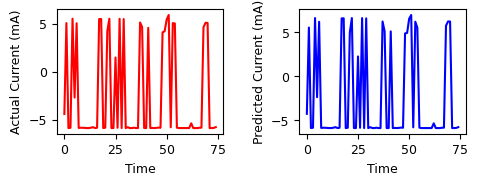

In [56]:
model = load_model('best_pv_readings_2.tf')
y_pred = model.predict(X_test).reshape(y_test.shape[0])[::5]
print(model.evaluate(X_test, y_test))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))

sns.lineplot(x=np.arange(0,y_pred.shape[0]), y=y_test[::5], color='red', ax=axes[0]);
sns.lineplot(x=np.arange(0,y_pred.shape[0]), y=y_pred, color='blue', ax=axes[1]);

axes[0].set_ylabel('Actual Current (mA)', fontsize=9)
axes[0].set_xlabel('Time', fontsize=9)
axes[1].set_ylabel('Predicted Current (mA)', fontsize=9)
axes[1].set_xlabel('Time', fontsize=9)
axes[0].tick_params(axis='both', which='major', labelsize=9)
axes[1].tick_params(axis='both', which='major', labelsize=9)
plt.tight_layout();